To get started, a neighborhood population data set was imported (https://data.fortworthtexas.gov/Property-Data/Neighborhood-Profile-Area-Data/ruhd-2sjc/about_data).

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fletcher Newman, fletcht13@tamu.edu, 332000276
# 02/7/2024


# ***IMPORTANT***
# The first population data file was too large to be included on GitHub,
# so it must be downloaded so it can be accessed localy by the program.
# (The .csv file is large)
# The code should aready be ready to accept the data set path if it is in
# the same directory.

# If for some reason, the data does not come through on canvas, here is a link
# to the data saved on google drive.
# https://drive.google.com/file/d/1bZbPNQm5Q7n38GOzbEEvg4jo-IJ7DI3V/view?usp=drive_link

In [3]:
df_addresses = pd.read_csv("/content/Neighborhood_Profile_Area_Data_20240207.csv")
df_addresses.head()

,ADDRESS,ZIPCODE,LAST_UPDATE_DATE,YEAR,NPA_NAME,LATITUDE,LONGITUDE,Location_1,SCHOOL_DISTRICT,POPULATION_2010,...,COMMERCIAL_BLD_PERMITS,RESIDENTIAL_BLD_PERMITS,REPORTED_S,EMERGENCY_,PCT_POOR_STREETS,SANITARY_SEWER_OVERFLOW_RATE,PCT_NEAR_GROCERY_STORE,PCT_NEAR_PARK,PCT_NEAR_LIBRARY,PCT_VOTER_TURNOUT
0,4705 BELLADONNA DR,76123,2024-02-04 09:55:25.3033333,2016,Greater Candleridge\ Meadow Creek,32.6250,-97.3942,"(32.625,-97.3942)",CROWLEY ISD,41170,...,16,192,19,47,0.008533,7,0.603181,0.994558,0.454190,0.391597
1,7204 NOHL RANCH RD,76133,2024-02-04 09:55:25.3033333,2016,Greater Candleridge\ Meadow Creek,32.6385,-97.3574,"(32.6385,-97.3574)",CROWLEY ISD,41170,...,16,192,19,47,0.008533,7,0.603181,0.994558,0.454190,0.391597
2,3725 DEL RIO DR,76133,2024-02-04 09:55:25.3033333,2016,Greater Candleridge\ Meadow Creek,32.6392,-97.3741,"(32.6392,-97.3741)",FORT WORTH ISD,41170,...,16,192,19,47,0.008533,7,0.603181,0.994558,0.454190,0.391597
3,2317 STAGECOACH ST,76133,2024-02-04 09:55:25.3033333,2017,Greater Candleridge\ Meadow Creek,32.6409,-97.3551,"(32.6409,-97.3551)",CROWLEY ISD,41170,...,31,248,35,0,0.009437,1,0.835681,0.970221,0.484333,0.000000
4,2921 VICKSBURG LN,76123,2024-02-04 09:55:25.3033333,2017,Greater Candleridge\ Meadow Creek,32.6187,-97.3628,"(32.6187,-97.3628)",CROWLEY ISD,41170,...,31,248,35,0,0.009437,1,0.835681,0.970221,0.484333,0.000000


In [4]:
df_addresses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124442 entries, 0 to 1124441
Data columns (total 36 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   ADDRESS                            1124442 non-null  object 
 1   ZIPCODE                            1124442 non-null  int64  
 2   LAST_UPDATE_DATE                   1124442 non-null  object 
 3   YEAR                               1124442 non-null  int64  
 4   NPA_NAME                           1124442 non-null  object 
 5   LATITUDE                           1124442 non-null  float64
 6   LONGITUDE                          1124442 non-null  float64
 7   Location_1                         1124442 non-null  object 
 8   SCHOOL_DISTRICT                    1121008 non-null  object 
 9   POPULATION_2010                    1124442 non-null  int64  
 10  MEDIAN_AGE                         1124442 non-null  int64  
 11  PCT_UNDER_18            

This data appears to already be clean, but just in case, the data is refined to make sure there are no missing or 0 values where there should not be in the catigories of intrest. Unnessisary catigories are also taken out.

In [5]:
df_refine = df_addresses[["NPA_NAME", "ZIPCODE", "LATITUDE", "LONGITUDE", "POPULATION_2010", "MEDIAN_AGE", "PCT_UNDER_18", "PCT_OVER_65", "PCT_UNEMPLOYED", "MEDIAN_HOUSEHOLD_INCOME", "PCT_POOR_STREETS"]]
df_refine = df_refine[(df_refine["POPULATION_2010"] > 0) | (df_refine["NPA_NAME"].notna()) | (df_refine["MEDIAN_AGE"] > 0)]

The data set consists of individual addresses, so the data frame was grouped by neiboorhood name (taking the mean of the sorted columns to keep the indivuidual neiborhood population) and sorted by their populations in decending order. The top 10 populations are the neighborhoods of intrest.

In [8]:
df_neighbor = df_refine.groupby(['NPA_NAME']).mean(numeric_only=True).sort_values(by=["POPULATION_2010"], ascending=False).head(10)
df_neighbor

,ZIPCODE,LATITUDE,LONGITUDE,POPULATION_2010,MEDIAN_AGE,PCT_UNDER_18,PCT_OVER_65,PCT_UNEMPLOYED,MEDIAN_HOUSEHOLD_INCOME,PCT_POOR_STREETS
NPA_NAME,,,,,,,,,,
Greater Candleridge\ Meadow Creek,76128.187669,32.633410,-97.378279,41170.0,35.0,0.292723,0.108930,0.083836,56946.0,0.008985
Northside,76131.807518,32.787647,-97.368195,40387.0,30.5,0.305691,0.101008,0.083459,33621.0,0.072112
Heritage\ Alliance Town Center,76243.894412,32.932911,-97.295139,34124.0,32.0,0.340735,0.050098,0.037791,93938.0,0.013850
Alliance Gateway,76244.871217,32.957560,-97.278378,27977.0,31.0,0.363920,0.043118,0.044798,91669.5,0.012890
Greater TCU,76109.146606,32.706102,-97.371163,25942.0,31.5,0.179623,0.119750,0.064210,79850.0,0.026832
Greater Hemphill,76110.623170,32.699456,-97.337638,25030.0,30.0,0.323526,0.074298,0.084398,35108.0,0.125474
Greater Marine Creek,76174.082100,32.854277,-97.405731,24754.0,30.0,0.326435,0.047659,0.044746,69828.0,0.005861
Greater City View,76131.996421,32.663876,-97.414805,23238.0,36.0,0.203631,0.155296,0.064581,55300.0,0.006237
Park Glen,76157.778814,32.884904,-97.275550,23093.0,33.5,0.310979,0.056060,0.068081,90586.0,0.014778


Out of curiosity, the locations of these neighborhoods will be plotted relative to each other to see where they are in relation to one another. This is to see if there are any neoghborhoods that could be potentialy grouped together going forward.

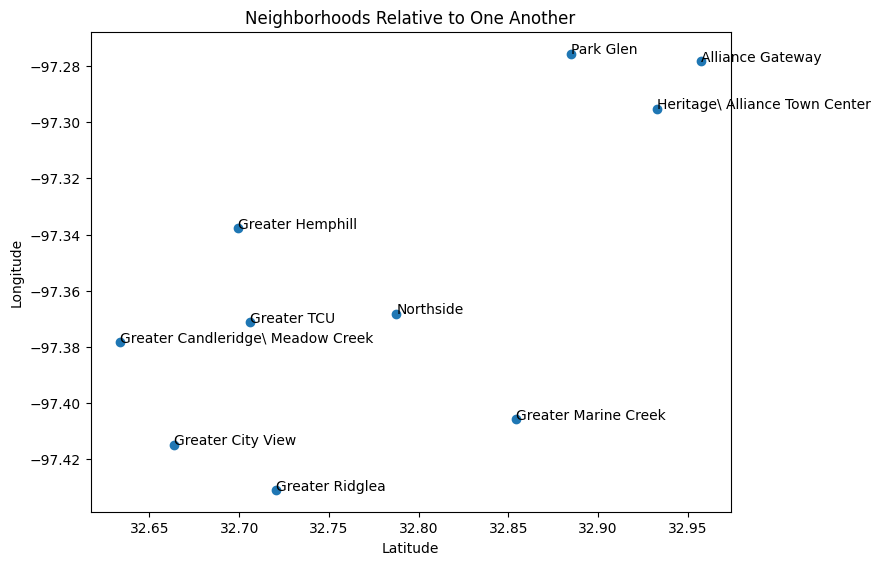

In [10]:
fig = plt.figure()

axis = fig.add_axes([0, 0, 1, 1])


axis.scatter(df_neighbor["LATITUDE"], df_neighbor["LONGITUDE"])

axis.set_title("Neighborhoods Relative to One Another")
axis.set_xlabel("Latitude")
axis.set_ylabel("Longitude")

for i in range(0, len(df_neighbor.index)):
  axis.text(df_neighbor["LATITUDE"][i], df_neighbor["LONGITUDE"][i], df_neighbor.index.values[i])

From the graph, it appears that all of the neighborhoods seem to be seperate from eachother other than Park Glen, Alliance Gateway, and Heritage/Alliance Town Center. Moving forward, these three neighborhoods will be clustered together and refered to as "North Fort Worth", not to be confused with "Northside"

In [11]:
df_North = df_neighbor.loc[["Park Glen", "Alliance Gateway", "Heritage\ Alliance Town Center"]].copy() #"Park Glen", "Alliance Gateway", "Heritage\Alliance Town Center"


Below is a graph showing each neighborhoods population vs their median income.

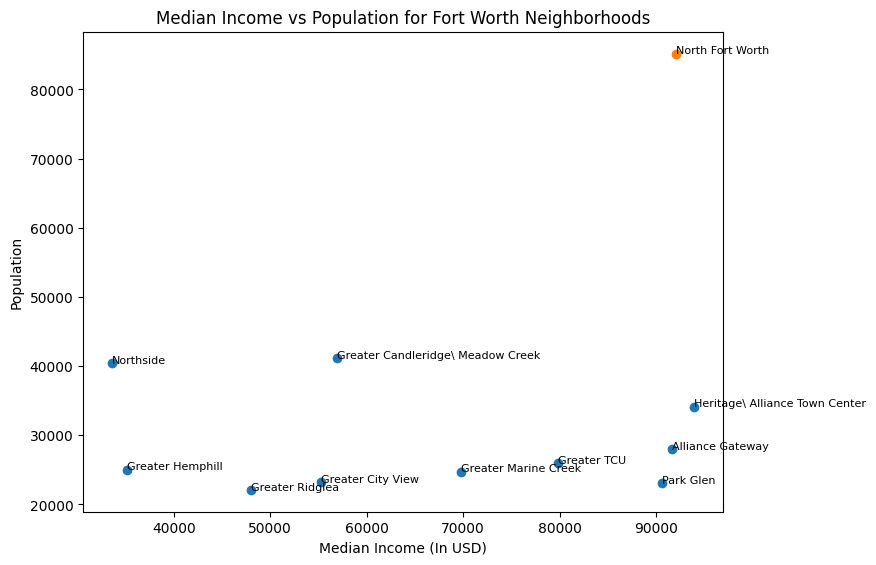

In [12]:
fig = plt.figure()

axis = fig.add_axes([0, 0, 1, 1])


axis.scatter(df_neighbor["MEDIAN_HOUSEHOLD_INCOME"], df_neighbor["POPULATION_2010"])
axis.scatter(df_North["MEDIAN_HOUSEHOLD_INCOME"].mean(), df_North["POPULATION_2010"].sum())
axis.text(df_North["MEDIAN_HOUSEHOLD_INCOME"].mean(), df_North["POPULATION_2010"].sum(), "North Fort Worth", fontsize=8)

axis.set_title("Median Income vs Population for Fort Worth Neighborhoods")
axis.set_xlabel("Median Income (In USD)")
axis.set_ylabel("Population")

for i in range(0, len(df_neighbor.index)):
  axis.text(df_neighbor["MEDIAN_HOUSEHOLD_INCOME"][i], df_neighbor["POPULATION_2010"][i], df_neighbor.index.values[i], fontsize=8)

This graph makes it very obvious that the combination of the North Fort Worth neighborhoods has a very high population. Below is the same graph, but without the combination of North Fort Worth.

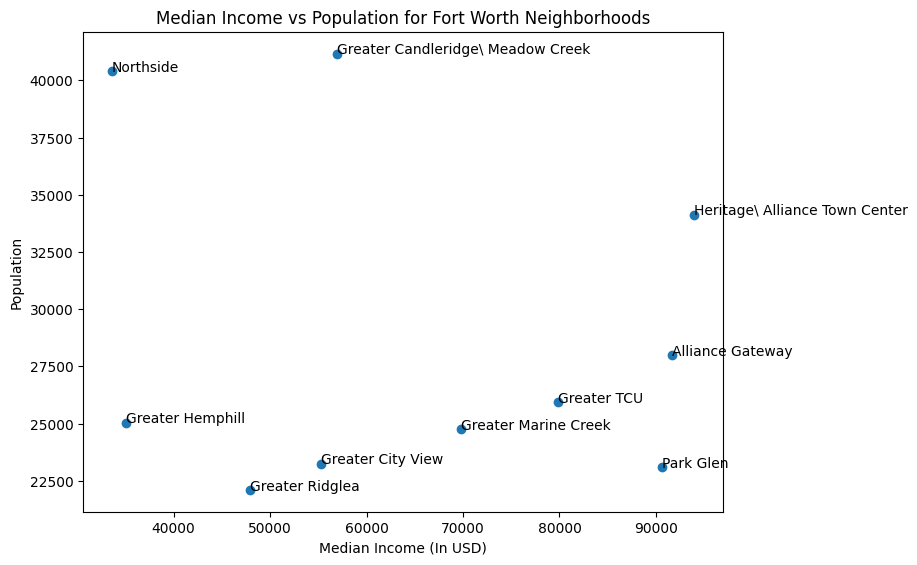

In [13]:
fig = plt.figure()

axis = fig.add_axes([0, 0, 1, 1])


axis.scatter(df_neighbor["MEDIAN_HOUSEHOLD_INCOME"], df_neighbor["POPULATION_2010"])
#axis.scatter(df_North["MEDIAN_HOUSEHOLD_INCOME"].mean(), df_North["POPULATION_2010"].sum())
#axis.text(df_North["MEDIAN_HOUSEHOLD_INCOME"].mean(), df_North["POPULATION_2010"].sum(), "North Fort Worth")

axis.set_title("Median Income vs Population for Fort Worth Neighborhoods")
axis.set_xlabel("Median Income (In USD)")
axis.set_ylabel("Population")

for i in range(0, len(df_neighbor.index)):
  axis.text(df_neighbor["MEDIAN_HOUSEHOLD_INCOME"][i], df_neighbor["POPULATION_2010"][i], df_neighbor.index.values[i])

Now it shows a better idea of the other neighborhoods that would be good contenders for a restaurant location.

This graph shows that, based off this data, Heritage/Alliance Town Center would be a good ideal location for a mediteranian resturant, with other locations such as Alliance Gateway and Greater Candleridge/Meadow Creek also being good options. It can also be noted that Heritage/Alliance Town Center is included in the North Fort Worth cluster. However, more catigories of data are needed to know for sure if it is the best.

Below, the Median Income is measured against the percent of poor streets in the neighborhood. Poor streets are roads in poor condition, not the economic wellness of a population on a street. This will tell us more about the overall wealth and appeal of the neighborhoods. (North Fort Worth will not be combined in this grpah, as the combined percentage data would not be accurate to reality since the number of roads in those neighborhoods is not avalible in this data set.)

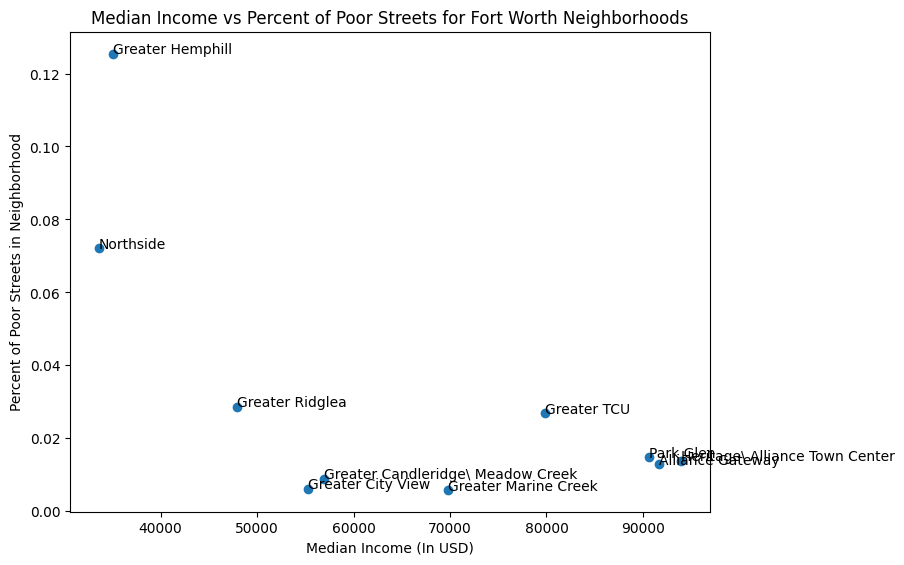

In [14]:
fig = plt.figure()

axis = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

axis.scatter(df_neighbor["MEDIAN_HOUSEHOLD_INCOME"], df_neighbor["PCT_POOR_STREETS"])

axis.set_title("Median Income vs Percent of Poor Streets for Fort Worth Neighborhoods")
axis.set_xlabel("Median Income (In USD)")
axis.set_ylabel("Percent of Poor Streets in Neighborhood")

for i in range(0, len(df_neighbor.index)):
  axis.text(df_neighbor["MEDIAN_HOUSEHOLD_INCOME"][i], df_neighbor["PCT_POOR_STREETS"][i], df_neighbor.index.values[i])

To better analyze the three clustered values in the bottom right (sweet spot of this graph), a sub data frame is created and plotted on the same graph.

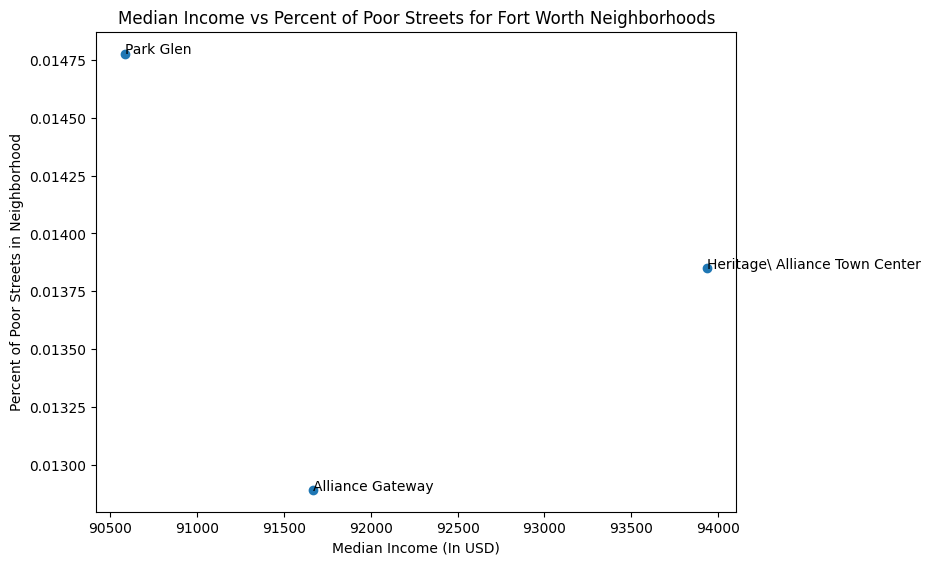

In [15]:
df_poorSt = df_neighbor.sort_values(by=["MEDIAN_HOUSEHOLD_INCOME"], ascending=False).head(3)

fig = plt.figure()

axis = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

axis.scatter(df_poorSt["MEDIAN_HOUSEHOLD_INCOME"], df_poorSt["PCT_POOR_STREETS"])

axis.set_title("Median Income vs Percent of Poor Streets for Fort Worth Neighborhoods")
axis.set_xlabel("Median Income (In USD)")
axis.set_ylabel("Percent of Poor Streets in Neighborhood")

for i in range(0, len(df_poorSt.index)):
  axis.text(df_poorSt["MEDIAN_HOUSEHOLD_INCOME"][i], df_poorSt["PCT_POOR_STREETS"][i], df_poorSt.index.values[i])

This blown up version of the previous graph strengthens the argument for Heritage/Alliance Town Center as the best neighborhood to open a resturant in terms of the economic stability of the area and its residents. It can be noted again that Heritage/Alliance Town Center and Park Glen are both included in North Fort Worth.

Using the outcomes from the two graphs, the locations of intrest can be narrowed down to a few areas in Fort Worth.

Now, the economic feasibility will be analyized for the different neigborhoods in Fort Worth. The data used in this analyis was recieved from the two links bellow and put together into one .csv file. Each property address was associated with the closest neighborhood in the area in order to align the data set with the previous one. Only the top 5 neigborhoods from the last data analyzation will be taken into consideration (Greater TCU, North Side, North Fort Worth, Greater Marine, Greater Candleridge/Meadow Creek). In choosing these five, population weighed heaiver than Median Income, which is why neighborhoods like Northside and Greater Candleridge/Meadow Creek have been included. This is because this research takes the view that the amount of traffic and people in the area will dictate a restaurants success more than the amount of money that they have, though both are important.


This data only consists of properties being sold at the moment the data was taken (2/8/2024). No information could be found about properties that are currently occupied, but data about properties on the market would be more benificial either way.

Restaurant Real Estate 1: https://www.loopnet.com/search/restaurants/fort-worth-tx/for-lease/?sk=ace9de2b8dd0b21ec85081c4dcd24a91&bb=9ppn_mo-1Jm2lyt3H

Restaurant Real Estate 2: https://www.crexi.com/lease/properties/TX/Fort_Worth/Restaurants?showMap=true&placeIds%5B%5D=ChIJrQfILRJuToYRvaxp3fiLr6Q&types%5B%5D=Restaurant&mapZoom=13&mapCenter=32.86582999555816,-97.36429051869838

In [16]:
df_RealEstate = pd.read_csv("https://github.com/fletcht13/ECEN360/raw/main/Assignment_1/FW_Commercial_RealEstate.csv")
df_RealEstate.head()

,NPA_NAME,ADDRESS,DOLLAR_PER_SF_PER_YEAR,MILES_TO_PUB_TRANS,NUMBER_OF_NEARBY_RESTAURANTS
0,Greater Candleridge\ Meadow Creek,3439 Altamesa Blvd,16.0,0.1,6
1,Greater Candleridge\ Meadow Creek,7674 McCart Ave,18.0,0.1,3
2,Greater Candleridge\ Meadow Creek,6207 S Hulen St,22.0,0.3,5
3,Greater TCU,3150 S Hulen St,35.0,0.1,4
4,Greater TCU,1664 S University Dr,50.0,0.1,4


In [17]:
df_nh_RealEstate = df_RealEstate.groupby(['NPA_NAME']).mean(numeric_only=True).sort_values(by=["DOLLAR_PER_SF_PER_YEAR"], ascending=False).round(2)
df_nh_RealEstate

,DOLLAR_PER_SF_PER_YEAR,MILES_TO_PUB_TRANS,NUMBER_OF_NEARBY_RESTAURANTS
NPA_NAME,,,
Greater TCU,33.20,0.11,2.80
North Fort Worth,21.69,0.72,6.40
North Side,21.00,0.31,5.20
Greater Marine Creek,20.33,1.17,4.00
Greater Candleridge\ Meadow Creek,18.67,0.17,4.67


A heat map is created to observe the potential correlations between catigories. this is to see if there are any catigories that seem to have a large affect on others, or if there are any negitive connotations with any specific catigory.  

<ipython-input-18-a842aca1a207>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_RealEstate.corr(), annot=True);


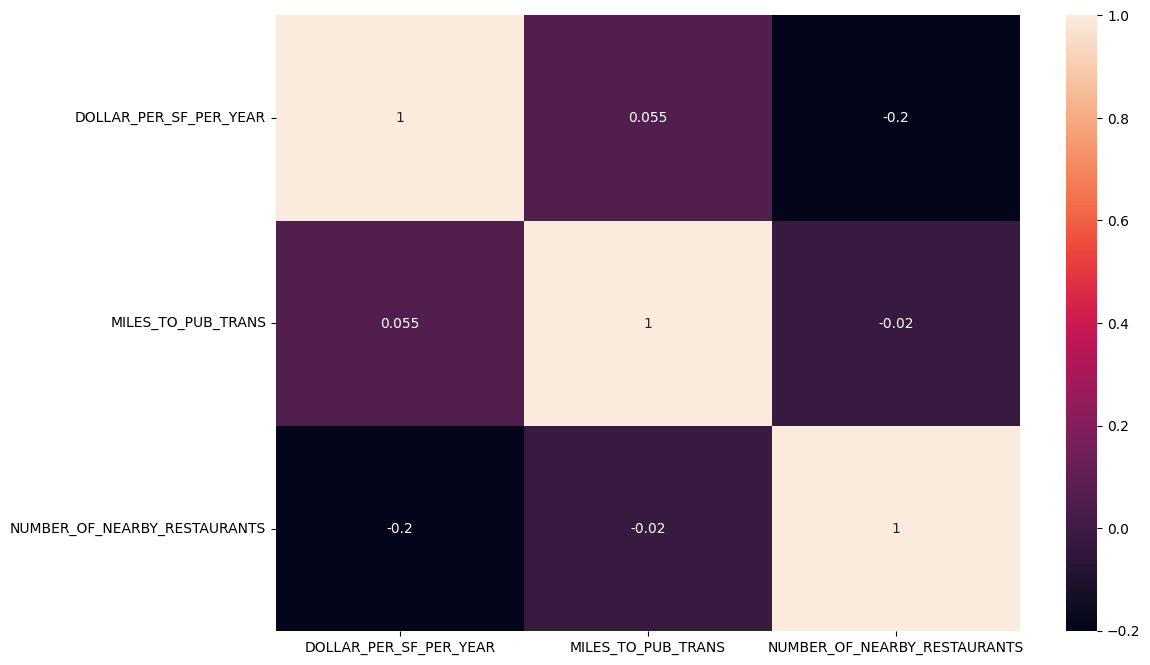

In [18]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df_RealEstate.corr(), annot=True);

Not much can be taken away by this heat map, as the correlation values are very low. If any observation can be made, it would be that the higher rent is, the number of competitors in the area tends to be lower. It does not seem like the number of miles to public transportation has much of a preference to the other catigories, so it will have to be considered relitive to each location.

Now, the 'dollars per square foot per year' for each neighborhood is graphed against the 'number of nearby restaurants'.

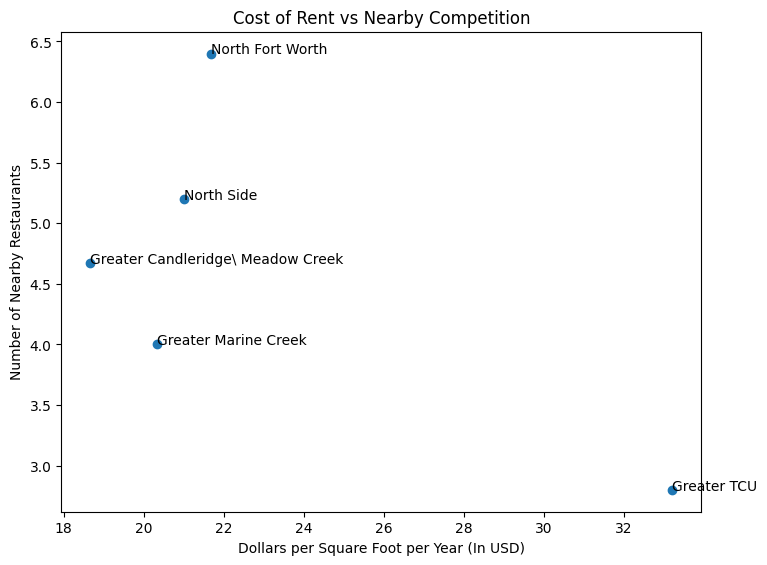

In [19]:
fig = plt.figure()

axis = fig.add_axes([0, 0, 1, 1])

axis.scatter(df_nh_RealEstate["DOLLAR_PER_SF_PER_YEAR"], df_nh_RealEstate["NUMBER_OF_NEARBY_RESTAURANTS"])

axis.set_title("Cost of Rent vs Nearby Competition")
axis.set_xlabel("Dollars per Square Foot per Year (In USD)")
axis.set_ylabel("Number of Nearby Restaurants")

for i in range(0, len(df_nh_RealEstate.index)):
  axis.text(df_nh_RealEstate["DOLLAR_PER_SF_PER_YEAR"][i], df_nh_RealEstate["NUMBER_OF_NEARBY_RESTAURANTS"][i], df_nh_RealEstate.index.values[i])

Before analyizing this plot, a consensus must be reached on the benifits of competition. In terms of the research conducted in this report. In terms of choosing a neighborhood, it would be most benifical to choose the one with the best population to competition ratio. But according to game theory, when choosing a specific location within that neighborhood, a restaurant would want to choose the area with the most competition. That being said, in this graph, the ideal neighborhood would be one with a low rent and low competition, which appears to be Greater Marine Creek and Greater Candleridge/Meadow Creek.
Now, the Dollars per Square Foot per Year is plotted against the Miles to Public Transportation. This Data is less important than the competition data since most of the population will be driving cars, especialy in a weathly area (which was previously analyized), but it its still another factor to take into consideration.

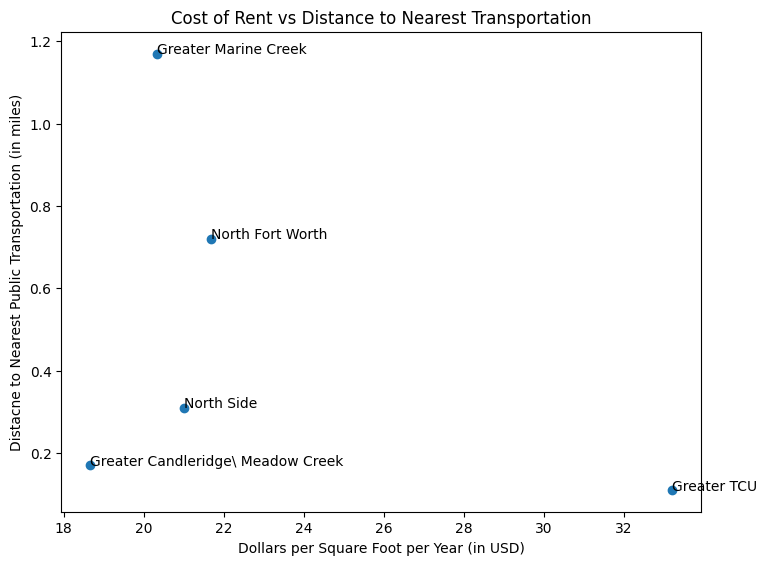

In [20]:
fig = plt.figure()

axis = fig.add_axes([0, 0, 1, 1])

axis.scatter(df_nh_RealEstate["DOLLAR_PER_SF_PER_YEAR"], df_nh_RealEstate["MILES_TO_PUB_TRANS"])

axis.set_title("Cost of Rent vs Distance to Nearest Transportation")
axis.set_xlabel("Dollars per Square Foot per Year (in USD)")
axis.set_ylabel("Distacne to Nearest Public Transportation (in miles)")

for i in range(0, len(df_nh_RealEstate.index)):
  axis.text(df_nh_RealEstate["DOLLAR_PER_SF_PER_YEAR"][i], df_nh_RealEstate["MILES_TO_PUB_TRANS"][i], df_nh_RealEstate.index.values[i])

Looking at these two graphs, Greater Candleridge/Meadow Creek appears to stand out the most, as it is the cheapest, has an avergae amount of surrounding competition, and is very close to public transportation stops. If we were to go down the route of 'less competition in the area is better for customer density',  the Greater TCU neighborhood would be a great location option, as it by has far the least amount of competition, and is the closest to public transportation options. The largest downside to the Greater TCU area is the cost, with rent prices averaging \$33.20 per square food per year, which is $10 more than the next highest rent area, North Fort Worth.

Greater Marine Creek: 76179
North Fort Worth: 76137
North Side: 76164
Greater Candleridge/Meadow Creek: 76133
Greater TCU: 76109

Next, the demographical data of the neighborhoods will be analyized. This data was taken from the US Census website which only stores location data through zip-codes. To line up each neighborhood with its coresponding census data, the zip-codes for each neighborhood were found by plugging in their coordinates into Google Maps and recording the resulting zip-codes. The zip-codes found for each neighborhood are listed below.

Greater Marine Creek: 76179,
North Fort Worth: 76137,
North Side: 76164,
Greater Candleridge/Meadow Creek: 76133,
Greater TCU: 76109


The resulting data did not format very well and has been signifigantly redused and cleaned in excel. There was lots of extra data and information that was unnessicary for our purposes, and lots of formatting issues from the .csv file that the Census website provided. Data on sex, age, housing, and voting age population were deleted, and the titles for each column were better formatted to show up in python in a more legible mannor. The POP_ESTIMATE and PERCENT columns were also changed from 'object' data types to 'float64' so that they could be delt with mathematicaly. The population values that were zero were also removed from the data set. Below is one of the resulting data sets for the Greater TCU area.

US Census Website: https://data.census.gov/table

In [21]:
df_TCU_demo = pd.read_csv("https://github.com/fletcht13/ECEN360/raw/main/Assignment_1/Greater_TCU_Demographics.csv")
df_TCU_demo.dropna(subset=["RACE"], inplace=True)
df_TCU_demo = df_TCU_demo.sort_values(by="POP_ESTIMATE", ascending=False).head()

df_GCMC_demo = pd.read_csv("https://github.com/fletcht13/ECEN360/raw/main/Assignment_1/Greater_Candleridge_Meadow_Creek_Demographics.csv")
df_GCMC_demo.dropna(subset=["RACE"], inplace=True)
df_GCMC_demo = df_GCMC_demo.sort_values(by="POP_ESTIMATE", ascending=False).head()

df_NorthSide_demo = pd.read_csv("https://github.com/fletcht13/ECEN360/raw/main/Assignment_1/North_Side_Demographics.csv")
df_NorthSide_demo.dropna(subset=["RACE"], inplace=True)
df_NorthSide_demo = df_NorthSide_demo.sort_values(by="POP_ESTIMATE", ascending=False).head()

df_NFW_demo = pd.read_csv("https://github.com/fletcht13/ECEN360/raw/main/Assignment_1/North_Fort_Worth_Demographics.csv")
df_NFW_demo.dropna(subset=["RACE"], inplace=True)
df_NFW_demo = df_NFW_demo.sort_values(by="POP_ESTIMATE", ascending=False).head()

df_GMC_demo = pd.read_csv("https://github.com/fletcht13/ECEN360/raw/main/Assignment_1/Greater_Marine_Creek_Demographics.csv")
df_GMC_demo.dropna(subset=["RACE"], inplace=True)
df_GMC_demo = df_GMC_demo.sort_values(by="POP_ESTIMATE", ascending=False).head()

df_TCU_demo

,RACE,POP_ESTIMATE,POP_ERROR,PERCENT,PERCENT_ERROR,Unnamed: 5
0,White,20537.0,"±1,410",0.80,±3.1,NaN
7,Asian,1664.0,±553,0.07,±2.0,NaN
1,Black or African American,1306.0,±411,0.05,±1.6,NaN
24,White and Some Other Race,840.0,±370,0.03,±1.4,NaN
20,Some Other Race,676.0,±354,0.03,±1.4,NaN


Below is five pie charts of the five different major neighborhoods and their ethnicities.

Text(0.5, 0.9, 'Greater Marine Creek')

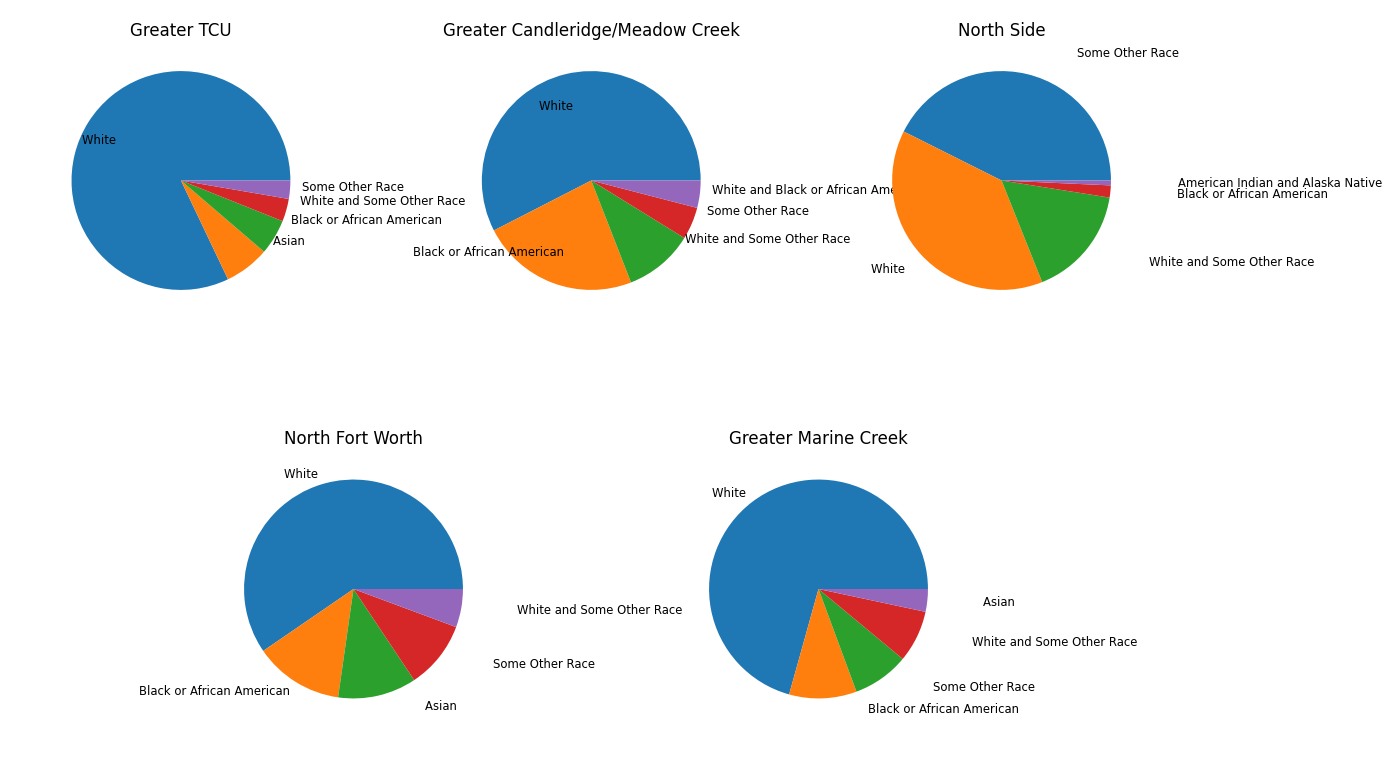

In [22]:
fig, axes = plt.subplots(2,3, figsize=(15,10))
axes[1][2].set_visible(False)

axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])

axes[0][0].pie(df_TCU_demo["POP_ESTIMATE"], labels=df_TCU_demo["RACE"], labeldistance=.7, textprops={'size': 'smaller'}, radius=.8)
axes[0][0].set_title("Greater TCU", y=.9)

axes[0][1].pie(df_GCMC_demo["POP_ESTIMATE"], labels=df_GCMC_demo["RACE"], labeldistance=.7, textprops={'size': 'smaller'}, radius=.8)
axes[0][1].set_title("Greater Candleridge/Meadow Creek", y=.9)

axes[0][2].pie(df_NorthSide_demo["POP_ESTIMATE"], labels=df_NorthSide_demo["RACE"], labeldistance=1.2, textprops={'size': 'smaller'}, radius=.8)
axes[0][2].set_title("North Side", y=.9)

axes[1][0].pie(df_NFW_demo["POP_ESTIMATE"], labels=df_NFW_demo["RACE"], labeldistance=1.1, textprops={'size': 'smaller'}, radius=.8)
axes[1][0].set_title("North Fort Worth", y=.9)

axes[1][1].pie(df_GMC_demo["POP_ESTIMATE"], labels=df_GMC_demo["RACE"], labeldistance=1.1, textprops={'size': 'smaller'}, radius=.8)
axes[1][1].set_title("Greater Marine Creek", y=.9)

None of the top five ethnicities for any of the neighborhoods consist of mediterranean ethnicities (from countries bordering the Mediterranean Sea), so the analysis of the demographics will have to look to another customer demographic to target. Due to lack of data sets on demographics of food preferences, previously existing research was used to find the race that prefers Mediteranean food. A study was done showing how, especialy in America, the Mediteranean diet has been adopted by and become very popular among white people. Durring this search for demographic preferences, another study was discovered showing that people with college educations are much more likely to adhere to a Mediteranean diet that those without. Because of this information, more weight will be put on the median income of an area (college educated people make more on average than those without), the Greater TCU area (high density of college students), and areas with a high percentage of white people. The links to the studies referenced are listed below.

College Students: https://thedo.osteopathic.org/2019/03/education-gender-may-affect-adherence-to-mediterranean-diet-study-finds/#:~:text=People%20with%20a%20college%20education,to%20follow%20the%20Mediterranean%20diet.

White People: https://sites.bu.edu/debiasse/files/2021/03/Burt_MedDiet.pdf


[0.8, 0.54, 0.38, 0.57, 0.68]


Text(0, 0.5, 'Percent of Population')

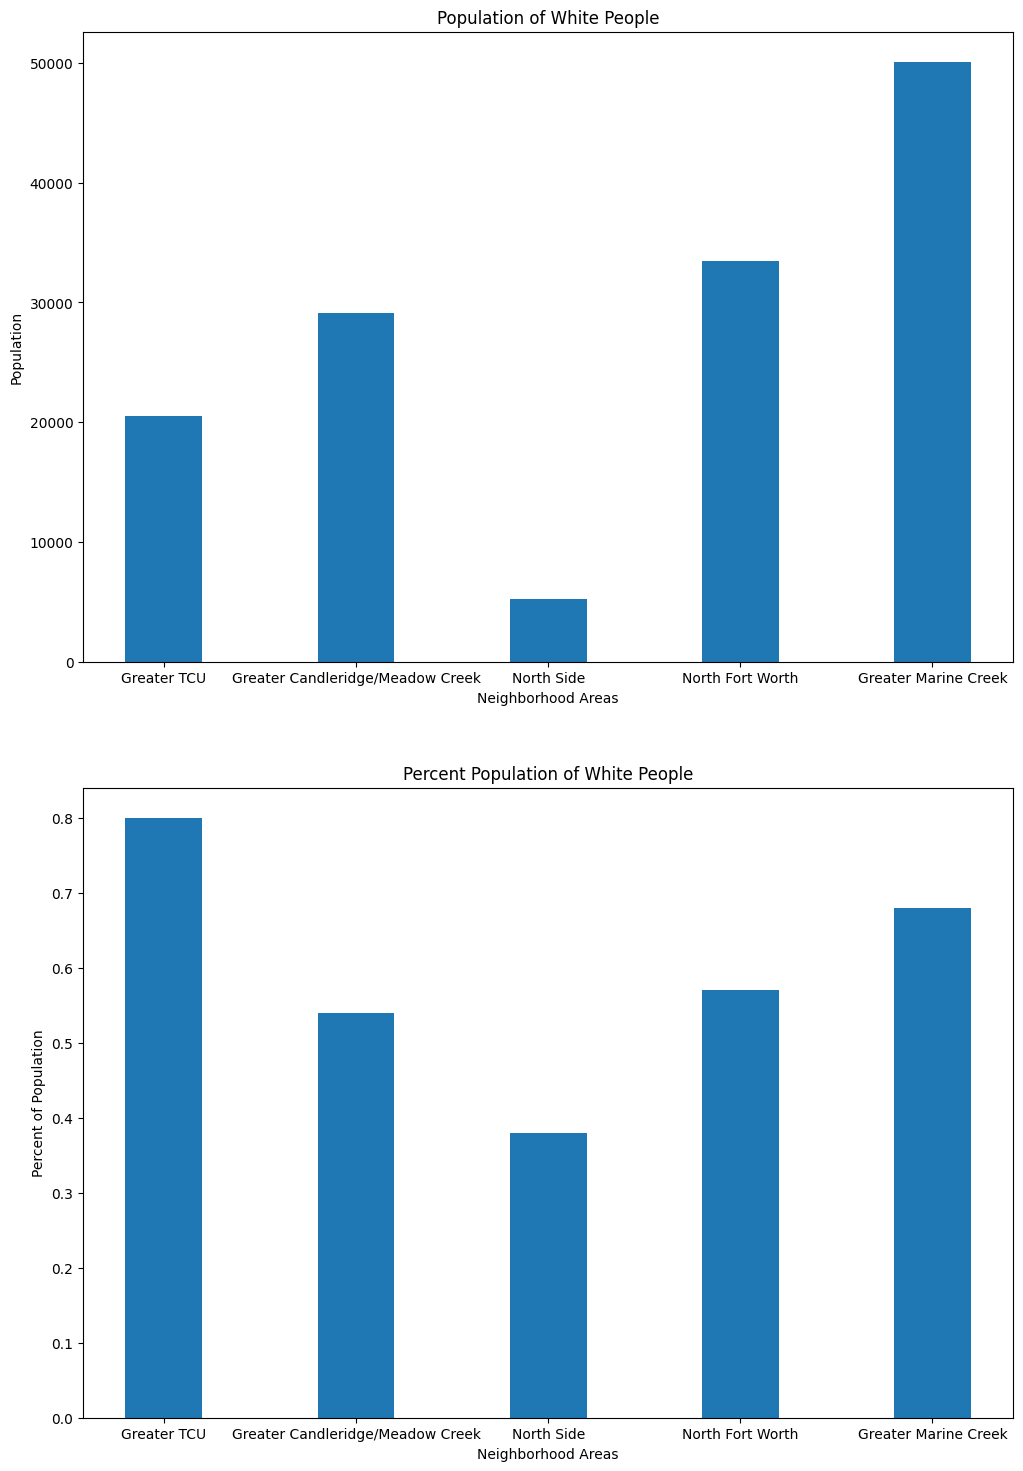

In [23]:
#White people
white_pop = {"Greater TCU": df_TCU_demo['POP_ESTIMATE'].loc[0], "Greater Candleridge/Meadow Creek": df_GCMC_demo['POP_ESTIMATE'].loc[0], "North Side": df_NorthSide_demo['POP_ESTIMATE'].loc[0],
              "North Fort Worth": df_NFW_demo['POP_ESTIMATE'].loc[0], "Greater Marine Creek": df_GMC_demo['POP_ESTIMATE'].loc[0]}

white_percent = {"Greater TCU": df_TCU_demo['PERCENT'].loc[0], "Greater Candleridge/Meadow Creek": df_GCMC_demo['PERCENT'].loc[0], "North Side": df_NorthSide_demo['PERCENT'].loc[0],
              "North Fort Worth": df_NFW_demo['PERCENT'].loc[0], "Greater Marine Creek": df_GMC_demo['PERCENT'].loc[0]}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,18))


pop_names = list(white_pop.keys())
pop_values = list(white_pop.values())
percent_names = list(white_percent.keys())
percent_values = list(white_percent.values())

print(percent_values)

ax1.bar(pop_names, pop_values, width=0.4)

ax1.set_title("Population of White People")
ax1.set_xlabel("Neighborhood Areas")
ax1.set_ylabel("Population")

ax2.bar(percent_names, percent_values, width=0.4)
ax2.set_title("Percent Population of White People")
ax2.set_xlabel("Neighborhood Areas")
ax2.set_ylabel("Percent of Population")

Based on all of the information gathered, my recomendation would be to open in the ***North Forth Worth area*** (zip-code 76137). This area has by far the largest population, and the second highest median income, which means there is a large customer base who, on average, have lots of money to spend. A high median income also means there are lots of college educated people in the area, which have been shown to prefer mediteranean food more than others as discussed in the previous paragraph. While less signifigant but worth mentioning, there is also a low percentange of poor streets in the neighborhoods contained in North Fort Worth. The rent in North Fort Worth is about averge when compared to the other top 5 areas making it very economically feasible, but does have lots of competing restaurants in the area. This can be seen as an upside however, because it prooves that this area is a hotspot for commercial dining venues and will have a large customer base looking for food there. North Fort Worth does tend to be further from public transportation, but that data is also less signifigant than the other data sets. And finaly, North Fort Worth has a large white population, in both raw size and percent of the populaion. This shows that the consumer trend would be leaning towards Mediteranean food in this area more than others, especialy with the high median income. Overall, the data has shown that North Fort Worth possess many of the qualities that a good Mediteranean Food restuarnt location would have, which is why it is my recomendation.


An argument can also be made for the ***Greater TCU area*** (zip-code 76109). This area has the 4th highest population out of Fort Worth neighborhoods (counting North Fort Worth as a combined area) and the 3rd highest median income. The Greater TCU area is the middle of the pack when it comes to percent of poor roads, but it has been concluded that not as much emphisis will be put on that statistic. The Greater TCU area also has the highest population of white people in the area, along with an abudnace of college students with TCU, a major D1 university, also located here. TCU being located in the neighborhood also means that there will be many large events held in the area, including major sports games such as basketball, baseball, and, most notebly, football games. TCU averaged 46,562 people per game two season ago (source cited below), which would dramatically increace the number of customers a restaurant in the area would see on a given weekend. The main problem with this area is the economic feasibility, as it has by far the highest rent of any of the areas, averaging over $32 per square foot per year. This is the main reason why the Greater TCU area is not the main recomendation, but I believe that the benifits of being in such close proximity to TCU's campus will even out this downside. I will also mention that there is very little competition in the area, and lots of nearby public transportation. Both of these upsides would be extremely benificial on days of major events and football games. All of this to say that the Greater TCU area would make a great choice for a restuarant location, but its downsides may make the North Fort Wort area a better location.  


TCU Football Attendance: https://collegefootballnews.com/rankings/college-football-attendance-rankings-2023-five-year-program-analysis

**Comprehensive List of Data Sets**

Fort Worth Neighborhood Population Data: https://data.fortworthtexas.gov/Property-Data/Neighborhood-Profile-Area-Data/ruhd-2sjc/about_data

Restaurant Real Estate 1: https://www.loopnet.com/search/restaurants/fort-worth-tx/for-lease/?sk=ace9de2b8dd0b21ec85081c4dcd24a91&bb=9ppn_mo-1Jm2lyt3H

Restaurant Real Estate 2: https://www.crexi.com/lease/properties/TX/Fort_Worth/Restaurants?showMap=true&placeIds%5B%5D=ChIJrQfILRJuToYRvaxp3fiLr6Q&types%5B%5D=Restaurant&mapZoom=13&mapCenter=32.86582999555816,-97.36429051869838

Fort Worth Race and Ethnicity Data (By Zip-Code): https://data.census.gov/table

College Students Mediteranean Preferance: https://thedo.osteopathic.org/2019/03/education-gender-may-affect-adherence-to-mediterranean-diet-study-finds/#:~:text=People%20with%20a%20college%20education,to%20follow%20the%20Mediterranean%20diet.

White People Mediteranean Preferance: https://sites.bu.edu/debiasse/files/2021/03/Burt_MedDiet.pdf

TCU Football Attendance: https://collegefootballnews.com/rankings/college-football-attendance-rankings-2023-five-year-program-analysis